In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import IPython.display as idis
import seaborn as sns
import copy
import scipy.stats as stat
import functools 
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 300
import functools
import smogn


In [2]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import xgboost


In [74]:
np.random.seed(1)
#load data
working_patient_data = pd.read_csv('first_vital_patient_data.csv')  
total_los_patient = pd.read_csv('total_los_patients.csv')
# print(working_patient_data.head())
# print(working_patient_data.shape)

# print(working_patient_data.shape)
# print(total_los_patient)
# drop_long_los = functools.reduce(lambda x, y: x + [y] if (total_los_patient.iloc[y,total_los_patient.columns.get_loc('total_los')] <= 10) & (total_los_patient.iloc[y,total_los_patient.columns.get_loc('total_los')] > 20 )  else x +[], [i for i in range(0,total_los_patient.shape[0])] ,[])
drop_long_los = total_los_patient.index[(total_los_patient['total_los'] <= 0) | (total_los_patient['total_los'] <60)].tolist()
# print(len(drop_long_los))
working_patient_data = working_patient_data.drop(drop_long_los)
total_los_patient = total_los_patient.drop(drop_long_los)
working_patient_data = working_patient_data.reset_index(drop=True)
total_los_patient = total_los_patient.reset_index(drop=True)

# print(total_los_patient)

drop_list = []

# 

# working_patient_data.shape
# print(total_los_patient.head())
# working_patient_data.iloc[1,:]
# total_los_patient.shape

working_patient_data = working_patient_data.fillna(0)
# working_patient_data['total_los'] = pd.Series(total_los_patient['total_los']).values

#replace ' ' in column by '_'
# working_patient_data.columns = [c.replace(' ', '_') for c in working_patient_data.columns]
working_patient_data.shape

(212, 215)

In [65]:
for i in range(1, 207,2):
    working_patient_data.iloc[:,i] = working_patient_data.iloc[:,i] - working_patient_data.iloc[:,i-1]

working_patient_data.head()

,alanine_aminotransferase,alanine_aminotransferase_last,albumin,albumin_last,albumin_ascites,albumin_ascites_last,albumin_pleural,albumin_pleural_last,albumin_urine,albumin_urine_last,alkaline_phosphate,alkaline_phosphate_last,anion_gap,anion_gap_last,asparate_aminotransferase,asparate_aminotransferase_last,basophils,basophils_last,bicarbonate,bicarbonate_last,bilirubin,bilirubin_last,blood_urea_nitrogen,blood_urea_nitrogen_last,calcium,calcium_last,calcium_ionized,calcium_ionized_last,calcium_urine,calcium_urine_last,cardiac_index,cardiac_index_last,cardiac_output_fick,cardiac_output_fick_last,cardiac_output_thermodilution,cardiac_output_thermodilution_last,central_venous_pressure,central_venous_pressure_last,chloride,chloride_last,chloride_urine,chloride_urine_last,cholesterol,cholesterol_last,cholesterol_hdl,cholesterol_hdl_last,cholesterol_ldl,cholesterol_ldl_last,co2,co2_last,"co2_(etco2,_pco2,_etc.)","co2_(etco2,_pco2,_etc.)_last",creatinine,creatinine_last,creatinine_ascites,creatinine_ascites_last,creatinine_body_fluid,creatinine_body_fluid_last,creatinine_pleural,creatinine_pleural_last,creatinine_urine,creatinine_urine_last,diastolic_blood_pressure,diastolic_blood_pressure_last,eosinophils,eosinophils_last,fibrinogen,fibrinogen_last,fraction_inspired_oxygen,fraction_inspired_oxygen_last,fraction_inspired_oxygen_set,fraction_inspired_oxygen_set_last,glascow_coma_scale_total,glascow_coma_scale_total_last,glucose,glucose_last,heart_rate,heart_rate_last,height,height_last,hematocrit,hematocrit_last,hemoglobin,hemoglobin_last,lactate,lactate_last,lactate_dehydrogenase,lactate_dehydrogenase_last,lactate_dehydrogenase_pleural,lactate_dehydrogenase_pleural_last,lactic_acid,lactic_acid_last,lymphocytes,lymphocytes_last,lymphocytes_ascites,lymphocytes_ascites_last,lymphocytes_atypical,lymphocytes_atypical_last,lymphocytes_atypical_csl,lymphocytes_atypical_csl_last,lymphocytes_body_fluid,lymphocytes_body_fluid_last,lymphocytes_percent,lymphocytes_percent_last,lymphocytes_pleural,lymphocytes_pleural_last,magnesium,magnesium_last,mean_blood_pressure,mean_blood_pressure_last,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_last,mean_corpuscular_hemoglobin_concentration,mean_corpuscular_hemoglobin_concentration_last,mean_corpuscular_volume,mean_corpuscular_volume_last,monocytes,monocytes_last,monocytes_csl,monocytes_csl_last,neutrophils,neutrophils_last,oxygen_saturation,oxygen_saturation_last,partial_pressure_of_carbon_dioxide,partial_pressure_of_carbon_dioxide_last,partial_pressure_of_oxygen,partial_pressure_of_oxygen_last,partial_thromboplastin_time,partial_thromboplastin_time_last,peak_inspiratory_pressure,peak_inspiratory_pressure_last,ph,ph_last,ph_urine,ph_urine_last,phosphate,phosphate_last,phosphorous,phosphorous_last,plateau_pressure,plateau_pressure_last,platelets,platelets_last,positive_end-expiratory_pressure,positive_end-expiratory_pressure_last,positive_end-expiratory_pressure_set,positive_end-expiratory_pressure_set_last,post_void_residual,post_void_residual_last,potassium,potassium_last,potassium_serum,potassium_serum_last,prothrombin_time_inr,prothrombin_time_inr_last,prothrombin_time_pt,prothrombin_time_pt_last,pulmonary_artery_pressure_mean,pulmonary_artery_pressure_mean_last,pulmonary_artery_pressure_systolic,pulmonary_artery_pressure_systolic_last,pulmonary_capillary_wedge_pressure,pulmonary_capillary_wedge_pressure_last,red_blood_cell_count,red_blood_cell_count_last,red_blood_cell_count_ascites,red_blood_cell_count_ascites_last,red_blood_cell_count_csf,red_blood_cell_count_csf_last,red_blood_cell_count_pleural,red_blood_cell_count_pleural_last,red_blood_cell_count_urine,red_blood_cell_count_urine_last,respiratory_rate,respiratory_rate_last,respiratory_rate_set,respiratory_rate_set_last,sodium,sodium_last,systemic_vascular_resistance,systemic_vascular_resistance_last,systolic_blood_pressure,systolic_blood_pressure_last,temperature,temperature_last,tidal_volume_observed,tidal_volume_observed_last,tidal_v

In [66]:
list(working_patient_data.columns)

['alanine_aminotransferase',
 'alanine_aminotransferase_last',
 'albumin',
 'albumin_last',
 'albumin_ascites',
 'albumin_ascites_last',
 'albumin_pleural',
 'albumin_pleural_last',
 'albumin_urine',
 'albumin_urine_last',
 'alkaline_phosphate',
 'alkaline_phosphate_last',
 'anion_gap',
 'anion_gap_last',
 'asparate_aminotransferase',
 'asparate_aminotransferase_last',
 'basophils',
 'basophils_last',
 'bicarbonate',
 'bicarbonate_last',
 'bilirubin',
 'bilirubin_last',
 'blood_urea_nitrogen',
 'blood_urea_nitrogen_last',
 'calcium',
 'calcium_last',
 'calcium_ionized',
 'calcium_ionized_last',
 'calcium_urine',
 'calcium_urine_last',
 'cardiac_index',
 'cardiac_index_last',
 'cardiac_output_fick',
 'cardiac_output_fick_last',
 'cardiac_output_thermodilution',
 'cardiac_output_thermodilution_last',
 'central_venous_pressure',
 'central_venous_pressure_last',
 'chloride',
 'chloride_last',
 'chloride_urine',
 'chloride_urine_last',
 'cholesterol',
 'cholesterol_last',
 'cholesterol_hdl'

In [75]:
# working_patient_data[(working_patient_data['alkaline_phosphate']>0)].loc[:200,['alkaline_phosphate','total_los']]
working_patient_data
working_patient_data.to_csv('large_than_60_day_los.csv',index=False)


In [6]:
625 

625

In [7]:
np.array(working_patient_data.iloc[0,:])

array([2.50000000e+01, 2.50000000e+01, 1.80000000e+00, 1.80000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.30000000e+01, 7.30000000e+01,
       2.06666667e+01, 1.50000000e+01, 6.90000000e+01, 6.90000000e+01,
       0.00000000e+00, 0.00000000e+00, 1.63333333e+01, 1.70000000e+01,
       8.00000000e-01, 8.00000000e-01, 4.42000000e+01, 4.20000000e+01,
       1.20000000e+01, 1.70000000e+01, 2.13333333e+01, 1.83333333e+01,
       6.92000006e+00, 6.69999990e+00, 9.63333333e-01, 1.13000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.68467999e+00, 2.52252007e+00,
       3.74000001e+00, 2.85666672e+00, 9.41316032e+00, 5.59701014e+00,
       1.30000000e+01, 9.00000000e+00, 1.09500000e+02, 1.11000000e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.60000000e+00, 2.50000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [8]:
def Euclidean_Dist(a,b):
    return np.linalg.norm(a-b)

In [9]:
print(Euclidean_Dist(np.array(working_patient_data.iloc[1,:]), np.array(working_patient_data.iloc[3,:])))

1825.6503845841266


In [10]:
total_los_patient[total_los_patient['total_los']<30]

,subject_id,hadm_id,icustay_id,total_los
0,3,145834,211552,10.7847
1,4,185777,294638,7.7590
2,6,107064,228232,16.3646
3,9,150750,220597,5.3231
4,11,194540,229441,25.5292
...,...,...,...,...
30431,99985,176670,279638,16.5958
30432,99991,151118,226241,12.1562
30433,99992,197084,242052,2.9951
30434,99995,137810,229633,3.2188


In [67]:
from math import log
total_los = np.array(total_los_patient['total_los'])
# total_los = [log(10,y) for y in total_los]

Text(0, 0.5, 'count')

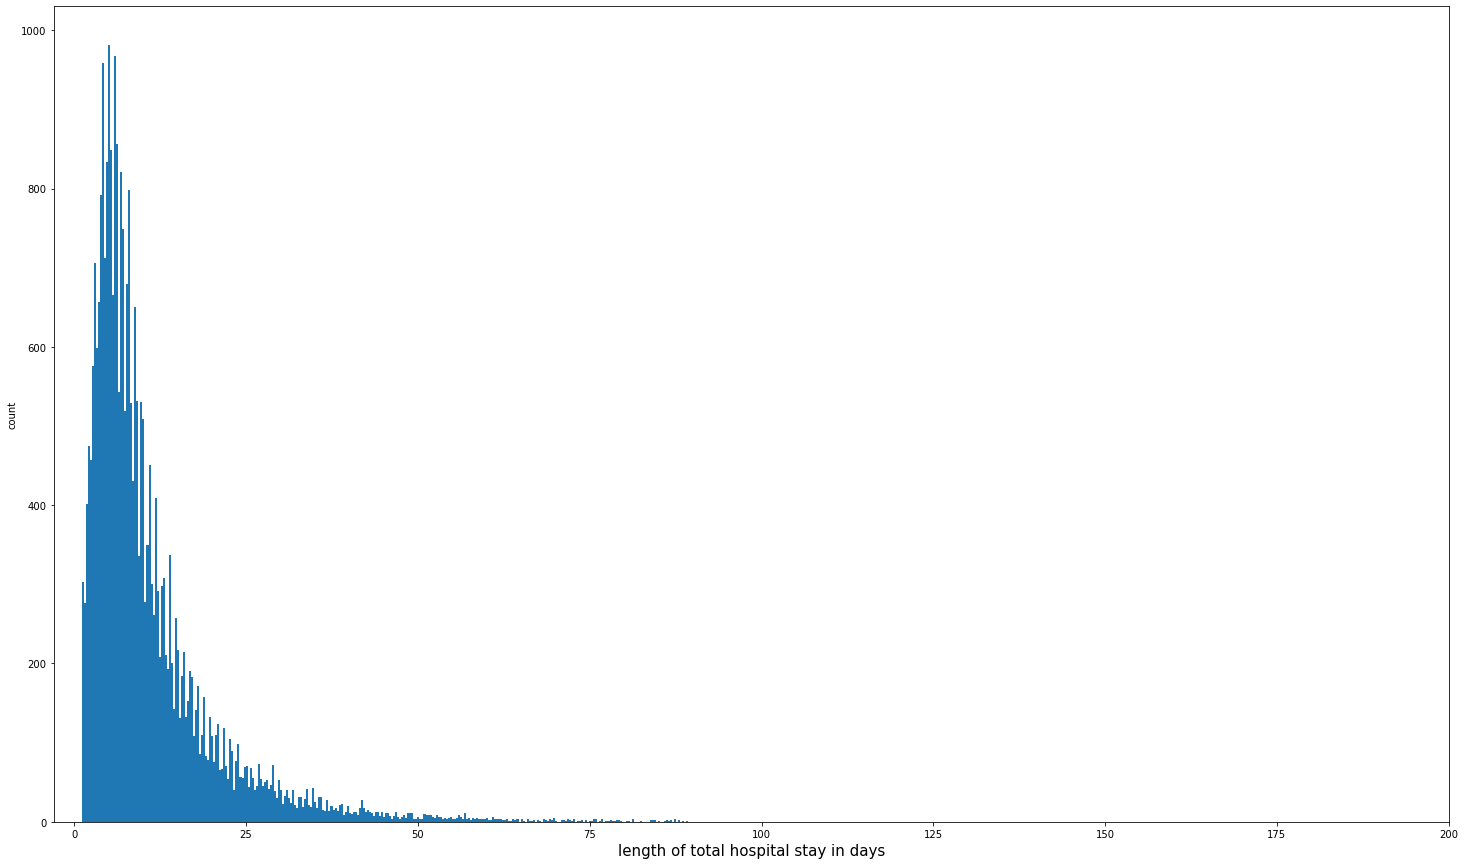

In [12]:

plt.figure(figsize=(25,15))
plt.hist(total_los, bins=300)
plt.xlim((-3,200))
plt.xlabel('length of total hospital stay in days', fontsize=15)
plt.ylabel('count', fontsize=10)

In [13]:
# plot total los distribution

# plt.figure(figsize=(16,10))
# plt.hist(total_los, bins=300)
# plt.xlim((-3,200))
# plt.xlabel('length of total hospital stay in days', fontsize=15)
# plt.ylabel('count', fontsize=15)

In [68]:
missingvalues = SimpleImputer(missing_values = np.nan, strategy = "constant", fill_value=0)
missingvalues = missingvalues.fit(working_patient_data)
working_patient_data = missingvalues.transform(working_patient_data)

In [69]:
mm_scaler = MinMaxScaler()
working_patient_data = mm_scaler.fit_transform(working_patient_data)
# y_train = [log(10,y) for y in y_train]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(working_patient_data, total_los, test_size=0.2, random_state=1)
print(X_train)

[[0.0034     0.40809722 0.68333333 ... 1.         0.         0.        ]
 [0.         0.40809722 0.         ... 1.         0.         0.        ]
 [0.         0.40809722 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40809722 0.         ... 0.         1.         0.        ]
 [0.         0.40809722 0.68333333 ... 0.         1.         0.        ]
 [0.         0.40809722 0.         ... 1.         0.         0.        ]]


Text(0, 0.5, 'count')

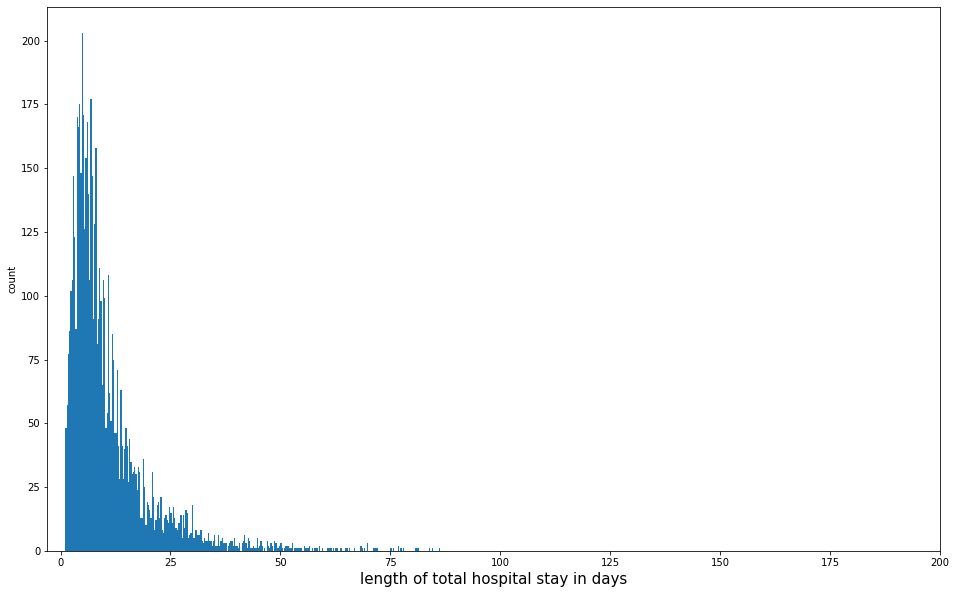

In [10]:

plt.figure(figsize=(16,10))
plt.hist(y_test, bins=300)
plt.xlim((-3,200))
plt.xlabel('length of total hospital stay in days', fontsize=15)
plt.ylabel('count', fontsize=10)

Text(0, 0.5, 'count')

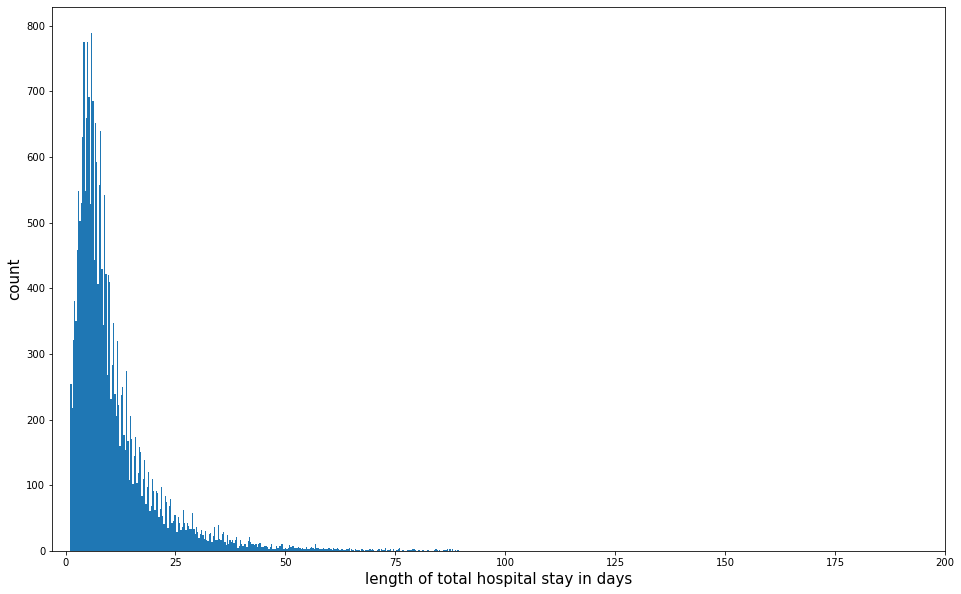

In [11]:

plt.figure(figsize=(16,10))
plt.hist(y_train, bins=300)
plt.xlim((-3,200))
plt.xlabel('length of total hospital stay in days', fontsize=15)
plt.ylabel('count', fontsize=15)

In [73]:
forest_regressor = RandomForestRegressor(max_depth=14, random_state=1, n_jobs=40, warm_start=True, max_features=10)
forest_regressor.fit(X_train, y_train)

training_loss = mean_absolute_error(y_train, forest_regressor.predict(X_train))
testing_loss = mean_absolute_error(y_test, forest_regressor.predict(X_test))

print('Training loss is {}'.format(training_loss))
print('Testing loss is {}'.format(testing_loss))

Training loss is 4.771979121832047
Testing loss is 6.028664034801033


In [71]:
clf = SVR(kernel='poly', verbose=True)
clf.fit(X_train, y_train)

training_loss = mean_absolute_error(y_train, clf.predict(X_train))
testing_loss = mean_absolute_error(y_test, clf.predict(X_test))

print('Training loss is {}'.format(training_loss))
print('Testing loss is {}'.format(testing_loss))

[LibSVM]Training loss is 5.423013238672675
Testing loss is 5.559976500093666


In [ ]:
bagging_regressor = BaggingRegressor(base_estimator=clf, n_estimators=20, random_state=1, n_jobs=40).fit(X_train, y_train)


training_loss = mean_absolute_error(y_train, bagging_regressor.predict(X_train))
testing_loss = mean_absolute_error(y_test, bagging_regressor.predict(X_test))

print('Training loss is {}'.format(training_loss))
print('Testing loss is {}'.format(testing_loss))

In [72]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.8,
                 gamma=0.4,                 
                 learning_rate=0.01,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=200,                                                                 
                 reg_alpha=0.4,
                 subsample=0.4,
                 early_stopping_rounds=10)
best_xgb_model.fit(X_train, y_train)


training_loss = mean_absolute_error(y_train, best_xgb_model.predict(X_train))
testing_loss = mean_absolute_error(y_test, best_xgb_model.predict(X_test))

print('Training loss is {}'.format(training_loss))
print('Testing loss is {}'.format(testing_loss))

# 

# sorted(feature_importance, key=lambda tup:(-tup[1], tup[0]))

# data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
# data.plot(kind='barh')

Training loss is 5.404098056787824
Testing loss is 5.708296560411291


In [31]:
lst = zip(y_test, clf.predict(X_test))
for i in lst:
    if i[0] >30:
        print(i)

(66.8583, 13.086556008654469)
(39.6049, 9.264072317265867)
(47.9854, 6.900956749360159)
(41.9674, 13.963798887673498)
(31.6431, 15.729087128830919)
(37.6271, 7.757372516206998)
(35.9243, 19.731441457596603)
(41.9326, 12.817448662478457)
(62.0333, 9.20559737157576)
(42.6736, 8.451927042165403)
(33.5569, 15.402730127231033)
(36.6847, 7.894328714144038)
(33.8729, 5.85679763971977)
(36.2014, 11.148337269634975)
(34.3215, 10.450735166606655)
(31.7944, 7.759355542879835)
(31.2167, 8.271004704904401)
(48.208999999999996, 11.896130834022596)
(31.8375, 10.199224135853916)
(30.2368, 11.656030324439122)
(41.6521, 12.133136921714271)
(46.916000000000004, 8.983616058884555)
(41.7792, 6.7286109106197)
(34.1611, 8.09405601654131)
(44.7458, 7.981090414271923)
(81.1437, 10.294623190491583)
(47.7528, 14.603054559364654)
(34.841, 13.761363301722529)
(44.8236, 11.643747545482631)
(47.1389, 10.304587686396571)
(37.0494, 9.924600235149555)
(30.7403, 8.19131203638299)
(35.1493, 6.3336207766246195)
(48.9625, 

In [138]:
lst_mae = abs(y_test - [10**y for y in clf.predict(X_test)])

Text(0, 0.5, 'number patient')

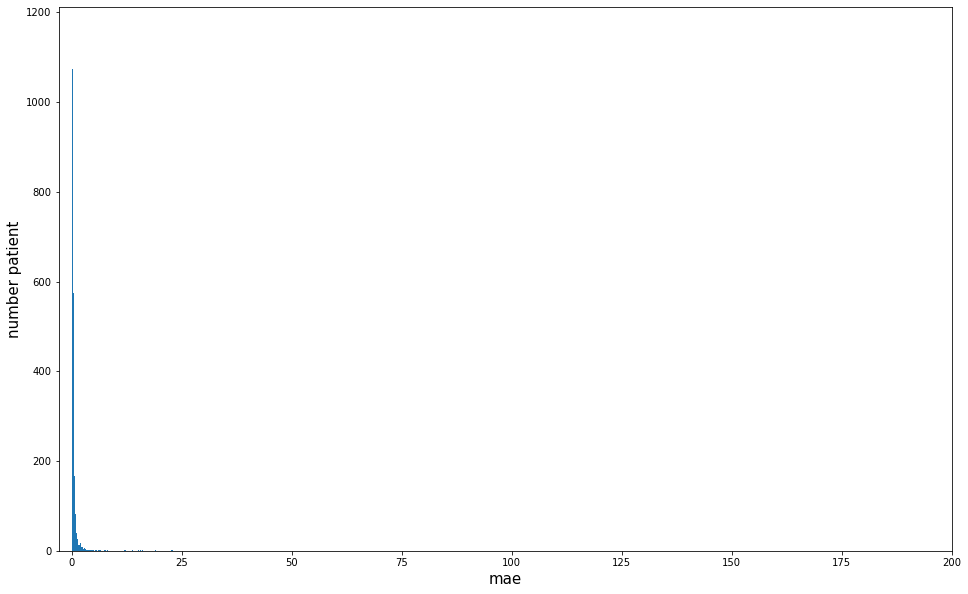

In [76]:
plt.figure(figsize=(16,10))
plt.hist(lst_mae, bins=300)
plt.xlim((-3,200))
plt.xlabel('mae', fontsize=15)
plt.ylabel('number patient', fontsize=15)

In [139]:
len([i for i in lst_mae if i<=3])/len(lst_mae)

0.24227989487516427

In [ ]:
los = alpha*|y-y_predict| (x in quantile 1) +(1-alpha)* |y-y_predict| (if x in quantile 2)